### README

Hice anotaciones en las celdas a medida que avanzaba en el desafío, sin embargo, 
las respuestas a las preguntas están justo debajo del número de la pregunta.

IMPORTANTE: Descomprimir archivo data que esta en la carpeta data para poder importarlo

### Import libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Pregunta 1

Importar datos

In [2]:
df = pd.read_csv('data/caudal_extra.csv')

### Pregunta 2

Hay 1.411.180 registros en el dataset, los que representan el comportamiento de las cuencas desde el año 1960 hasta el 2018.
Hay solo 2 columnas con missing values: 
        precip_promedio con 2% de missing values
        temp_max_promedio con 10.7% de missing values

Al analizar la cantidad de missing values por año se aprecia una disminución significativa en la cantidad de registros nulos por año a medida pasan los años. Con esto, es probable que los missing values sean en aquellas cuencas donde las estaciones de precipitaciones y temperaturas, no estaban en el polígono aguas arriba de la estación del caudal. 

La disminución de missing values en el tiempo puede tener origen en la instalación de nuevos equipos dentro del polígono,
y las oscilaciones pueden significar fallas en los equipos de medición.

Hay que destacar que hay 29 cuencas diferentes en el dataset, donde 8 de ellas concentran el 60% de los datos. Ademas, la mayoria de las estaciones se encuentran en la parte central de Chile.

De acuerdo a las distribuciones de los datos, se ve que las variables caudal y precip_promedio están colapsadas hacia la izquierda indicando la presencia de outliers muy grandes, lo que se puede comprobar en los boxplots. Por otra parte, la temperatura máxima promedio sigue una distribución normal. Por último, de la distribución de altura, se puede decir que la mayoría de los registros fueron capturados bajo los 1500 metros de altura y solo un pequeño porcentaje sobre esa medida.

En cuanto a la correlación de los datos, se puede destacar que las precipitaciones y el caudal tienen una correlación en torno al 20%.

De la evolución de los percentiles en el tiempo, se ve claramente que la "operación normal" del caudal se mantiene constante a lo largo del tiempo, sin embargo, el percentil 95 aumenta significativamente, indicando, que los caudales extremos son cada vez más extremos. Las precipitaciones y temperatura no presentan variaciones significativas en su distribución a lo largo del tiempo.

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
#Transform to correct datatype and get year
df['fecha'] = pd.to_datetime(df['fecha'])
df['year'] = df['fecha'].apply(lambda x: x.year)
df['month'] = df['fecha'].apply(lambda x: x.month)
df['codigo_cuenca'] = df['codigo_cuenca'].apply(lambda x: 'COD_CUENCA_'+str(x)) #Make codigo_cuenca OBJECT
df['codigo_estacion'] = df['codigo_estacion'].apply(lambda x: 'COD_ESTACION_'+str(x)) #Make codigo_estacion OBJECT
df['gauge_id'] = df['gauge_id'].apply(lambda x: 'COD_GAUGE_'+str(x)) #Make gauge_id OBJECT

In [4]:
"""
1411180 Registros
"""
df.shape

(1411180, 18)

In [5]:
df.head(5)

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,year,month
0,COD_ESTACION_4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,COD_CUENCA_45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,COD_GAUGE_4540001,Rio Grande En Paloma 1,0.0,NaN,1960,1
1,COD_ESTACION_4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,COD_CUENCA_45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,COD_GAUGE_4540001,Rio Grande En Paloma 1,0.0,NaN,1960,3
2,COD_ESTACION_4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,COD_CUENCA_45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,COD_GAUGE_4540001,Rio Grande En Paloma 1,0.0,NaN,1960,5
3,COD_ESTACION_4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,COD_CUENCA_45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30 00:00:00+00:00,3.590,COD_GAUGE_4540001,Rio Grande En Paloma 1,0.0,NaN,1960,6
4,COD_ESTACION_4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,COD_CUENCA_45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22 00:00:00+00:00,1.370,COD_GAUGE_4540001,Rio Grande En Paloma 1,0.0,NaN,1960,7


### IDENTIFY CATEGORICAL AND NUMERICAL ATRIBUTES

In [6]:
DATE = ['fecha']
CATEGORICAL = [col for col in df.columns if df[col].dtype == object]
# DROP fecha y agregar codigo cuenca
CATEGORICAL = [col for col in CATEGORICAL if col != 'fecha']
NUMERICAL = [col for col in df.columns if col not in CATEGORICAL]

In [7]:
"""
Primer registro 1960-01-02
Ultimo registro 2018-03-09
"""
for col in DATE:
    print(col, df[col].min(), df[col].max())

fecha 1960-01-02 00:00:00+00:00 2018-03-09 00:00:00+00:00


In [8]:
"""
La columna con las precipitaciones promedio tienen un 2% de missing values
La columna con la temperatura max promedio tiene un 10.7% de missing values
"""
df.isnull().sum()*100/df.shape[0]

codigo_estacion            0.000000
institucion                0.000000
fuente                     0.000000
nombre                     0.000000
altura                     0.000000
latitud                    0.000000
longitud                   0.000000
codigo_cuenca              0.000000
nombre_sub_cuenca          0.000000
cantidad_observaciones     0.000000
fecha                      0.000000
caudal                     0.000000
gauge_id                   0.000000
gauge_name                 0.000000
precip_promedio            1.967644
temp_max_promedio         10.740161
year                       0.000000
month                      0.000000
dtype: float64

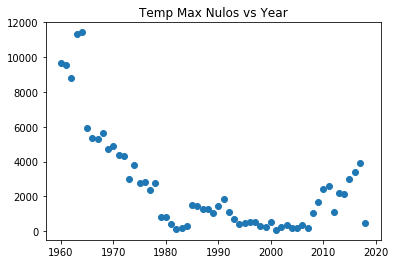

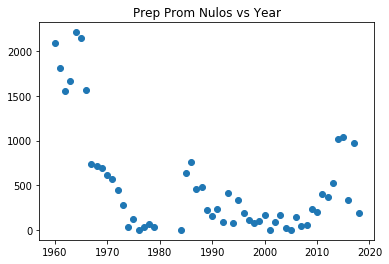

In [9]:
"""
Hay una disminución significativa en la cantidad de registros nulos por año a medida pasan los años, 
con algunas oscilaciones.

Es probable que los missing values sean en aquellas cuencas donde las estaciones de precipitaciones y temperaturas,
no estaban en el poligono aguas arriba de la estación del caudal.

La disminución de missing values en el tiempo puede tener origen en la instalación de nuevos equipos dentro del poligono,
y las oscilaciones pueden significar fallas en los equipos de medición.
"""

#Get total nulls by year
temp_max_nulls = df[df['temp_max_promedio'].isnull()].groupby('year')['fuente'].count().reset_index()
prep_prom_nulls = df[df['precip_promedio'].isnull()].groupby('year')['fuente'].count().reset_index()

plt.title('Temp Max Nulos vs Year')
plt.scatter(temp_max_nulls['year'], temp_max_nulls['fuente'])
plt.show()

plt.title('Prep Prom Nulos vs Year')
plt.scatter(prep_prom_nulls['year'], prep_prom_nulls['fuente'])
plt.show()

In [10]:
"""
Hay solo una institución y fuente las cuales significan lo mismo: GGA y dga_web respectivamente
Hay 133 nombres de cuencas, gauge_name, gauge_id y codigo_estacion los cuales significan lo mismo
Hay 29 cuencas diferentes
"""
#Cantidad de valores unicos para las variables categoricas
n_categories = []
for col in CATEGORICAL:
    n_categories.append((col, df[col].nunique()))

display(pd.DataFrame(n_categories))

,0,1
0,codigo_estacion,133
1,institucion,1
2,fuente,1
3,nombre,133
4,codigo_cuenca,29
5,nombre_sub_cuenca,78
6,gauge_id,133
7,gauge_name,133


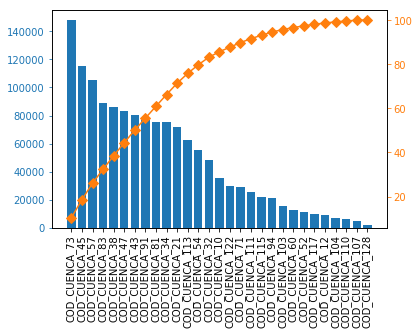

In [11]:
"""
Hay 8 de 29 cuencas que concentran el 60% de los registros del dataset
"""
#Get registros x cuenca
rows_by_cuenca = df.groupby('codigo_cuenca')['fuente'].count().reset_index()
rows_by_cuenca = rows_by_cuenca.sort_values(by='fuente', ascending=False)
rows_by_cuenca["cumpercentage"] = rows_by_cuenca["fuente"].cumsum()/rows_by_cuenca["fuente"].sum()*100


fig, ax = plt.subplots()
ax.bar(rows_by_cuenca['codigo_cuenca'], rows_by_cuenca["fuente"], color="C0")
ax2 = ax.twinx()
ax2.plot(rows_by_cuenca['codigo_cuenca'], rows_by_cuenca["cumpercentage"], color="C1", marker="D", ms=7)

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.set_xticklabels(rows_by_cuenca['codigo_cuenca'] ,rotation=90)
plt.show()

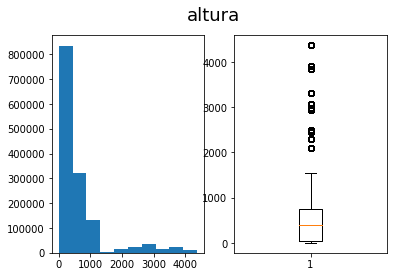

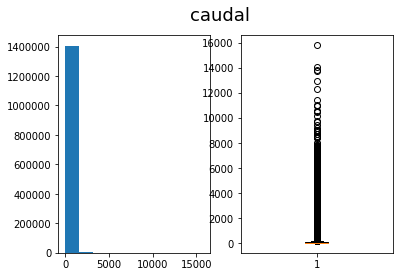

c:\users\bldr1\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\bldr1\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


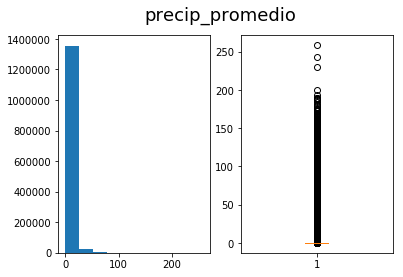

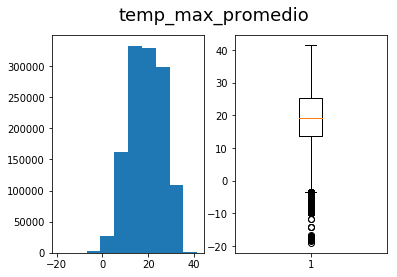

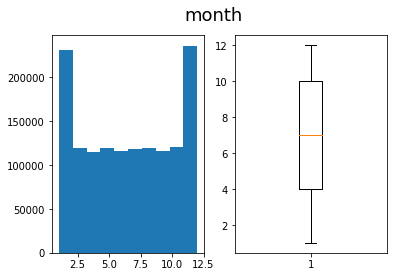

In [12]:
"""
La distribucion del caudal y la precipitación promedio estan colapsadas hacia la izquierda indicando la presencia
de outliers muy grandes, lo que se puede comprobar en los boxplots
La temperatura maxima promedio sigue una distribucion Normal
De la distribucion de altura, se puede decir que la mayoria de los registros fueron capturados bajo los 1500
metros de altura y solo un pequeño porcentaje sobre los 1500 metros (outliers).
"""
#plot histograms and boxplots
for col in NUMERICAL:
    if (col != 'latitud') & (col != 'longitud') & (col != 'year') & (col != 'cantidad_observaciones') & (col != 'fecha'):
        fig, axs = plt.subplots(nrows=1, ncols=2)
        fig.suptitle(col, fontsize=18)
        axs[0].hist(df[col])
        axs[1].boxplot(df[col].dropna())
        plt.show()

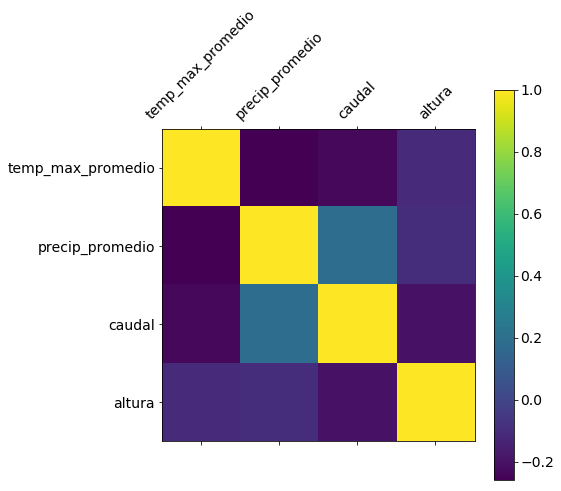

In [13]:
"""
El caudal y la prep promedio tienen una correlacion en torno al 20%
"""

#plot correlation
CORR_COLS = ['temp_max_promedio', 'precip_promedio', 'caudal', 'altura']
f = plt.figure(figsize=(7, 7))
plt.matshow(df[CORR_COLS].corr(), fignum=f.number)
plt.xticks(range(CORR_COLS.__len__()), CORR_COLS, fontsize=14, rotation=45)
plt.yticks(range(CORR_COLS.__len__()), CORR_COLS, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

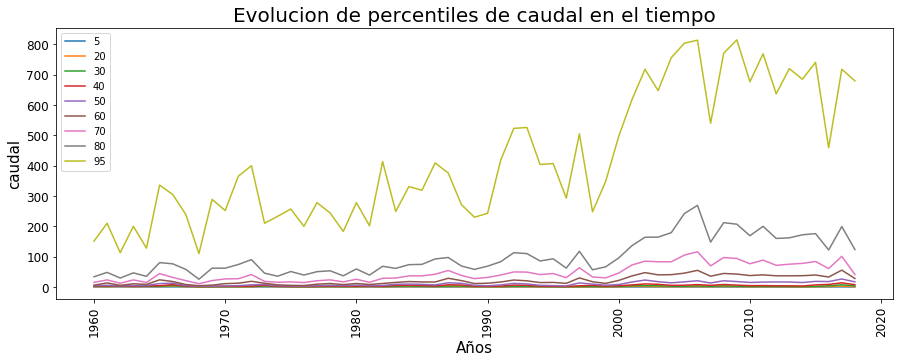

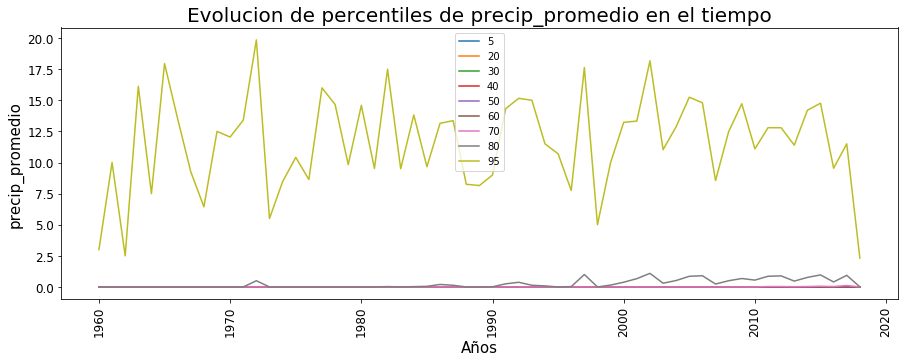

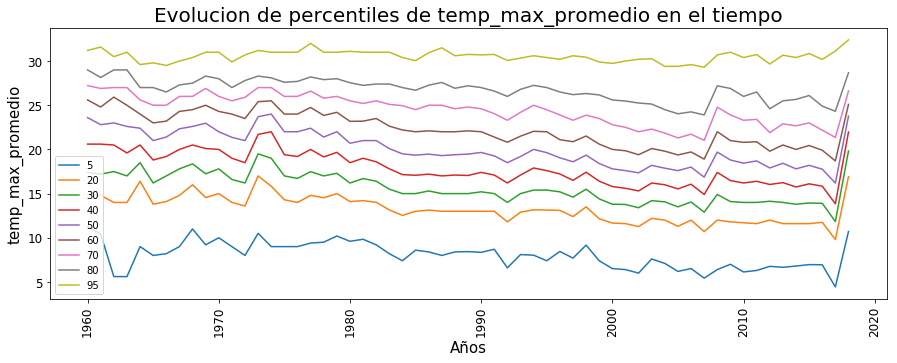

In [14]:
"""
La distribucion de los caudales es relativamente estable a lo largo del tiempo, excepto por los 
caudales extremos (percentil 95) que son cada vez mas extremos
"""

def percentiles_plot(target):
    plt.figure(figsize=(15,5))
    #esto se puede aplicar para una estacion en particular
    PERS = [5,20, 30, 40, 50, 60, 70, 80, 95]
    for p in PERS:
        tmp = df[['year',target]].groupby(by='year').quantile(p/100).reset_index()
        plt.plot(tmp['year'], tmp[target], label=p)
        
    plt.xlabel('Años', fontsize=15)
    plt.ylabel(target, fontsize=15)
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.title('Evolucion de percentiles de {} en el tiempo'.format(target), fontsize=20)
    plt.show()
    
percentiles_plot('caudal')
percentiles_plot('precip_promedio')
percentiles_plot('temp_max_promedio')

In [15]:
"""
Las cuencas estudiadas estan localizadas a lo largo de todo chile, sin embargo, la mayoria de los datos se concentran
en la zona central.
"""
print('')

![title](map2.PNG)

### Pregunta 3

Con la siguientes funciones se puede graficar la evolución del caudal, precipitaciones y temperatura máxima dentro de un rango de fechas para una estación determinada. Para el caso de la estación XX no se ve ningún patrón a simple vista.

In [16]:
def time_plot_estacion(codigo_estacion, columna, fecha_min, fecha_max):
    tmp = df[['fecha', 'codigo_estacion' ,columna]].copy()
    tmp = tmp[(tmp['fecha']>=fecha_min)&(tmp['fecha']<=fecha_max)]
    tmp = tmp[tmp['codigo_estacion'] == codigo_estacion]
    #min max normalization to keep data shape
    tmp[columna] = (tmp[columna] - tmp[columna].min() ) / (tmp[columna].max() - tmp[columna].min())
    tmp = tmp.sort_values(by='fecha')
    plt.plot(tmp['fecha'], tmp[columna], label=columna)
    
def time_plot_estacion_cols(codigo_estacion, columnas, fecha_min, fecha_max):
    plt.figure(figsize=(15,5))
    for col in columnas:
        time_plot_estacion(codigo_estacion, col, fecha_min, fecha_max)
    
    plt.title(codigo_estacion+' min-max normalization', fontsize=18)
    plt.legend()
    plt.show()

c:\users\bldr1\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


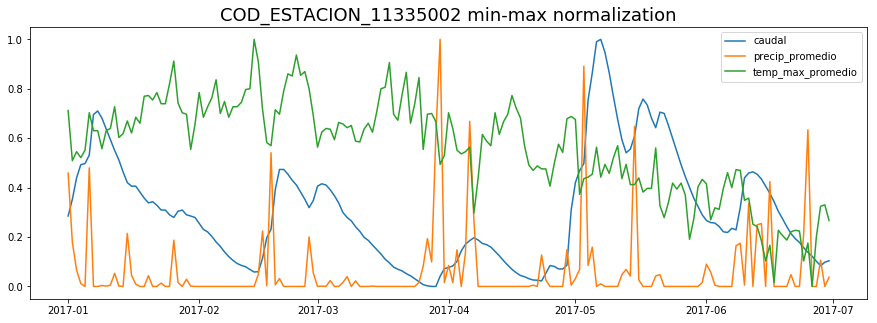

In [17]:
time_plot_estacion_cols('COD_ESTACION_11335002', 
                        ['caudal','precip_promedio', 'temp_max_promedio'], 
                        '2017-01-01','2020-01-01')

### Pregunta 4

La medida de caudales, precipitaciones y temperaturas extremas no es suficiente ya que ignora las relaciones geo-espaciales de las cuencas, por ejemplo, una cuenca con un caudal mucho mayor que las cuencas vecinas también podría ser considerado un caudal extremo.

Esta medida tampoco toma en cuenta la distribución de las variables, sobre todo para el cálculo de caudales y precipitaciones extremas, ya que estas distribuciones no son normales y tienen muchos outliers.

In [18]:
#Estaciones de Enero a Dic
ESTACIONES = ['Verano','Verano','Verano','Otoño','Otoño','Otoño',
              'Invierno','Invierno','Invierno','Primavera','Primavera','Primavera']
ESTACIONES = dict(zip(range(1,13), ESTACIONES))
df['estacion'] = df['month'].map(ESTACIONES)

In [19]:
"""
Esta medida no es suficiente, ya que ignora las relaciones geo-espaciales de las cuencas, por ejemplo,
se pueden definir como caudales extremos aquellos caudales mayor al percentil 95 de los caudales
de las cuencas cercanas (espacialmente).

Por último, esta medida no toma en cuenta la distribución de las variables, sobre todo para el calculo de 
caudales y precipitaciones extremas, ya que estas distribuciones no son normales y tienen muchos outliers.
"""

def detect_extremos(targets=['caudal','precip_promedio','temp_max_promedio']):
    tmp = df.copy()
    #get percentil 95 for each target
    for target in targets:
        tmp['{}_95'.format(target)] = tmp.groupby(by=['codigo_estacion','estacion'])[target]\
                                                    .transform(lambda x: x.quantile(0.95))
    
    tmp['caudal_extremo'] = tmp['caudal']>tmp['caudal_95']
    tmp['temp_extremo'] = tmp['temp_max_promedio']>tmp['temp_max_promedio_95']
    tmp['precip_extremo'] = tmp['precip_promedio']>tmp['precip_promedio_95']
    return tmp
    
df = detect_extremos()

### Pregunta 5

Este histograma con una distribución casi uniforme indica una alta variabilidad en la cantidad de caudales extremos detectados en las estaciones.

Sería interesante observar si hay alguna relación entre la cantidad de caudales extremos y la región donde se encuentra la estación.

Text(0.5, 1.0, 'Histograma de cantidad de caudales extremos por estacion')

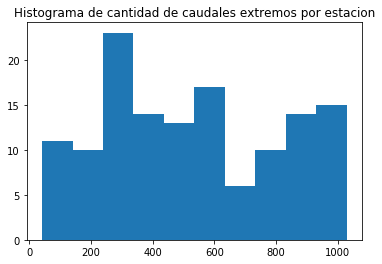

In [20]:
"""
Esto indica que hay una distribución casi uniforme en la cantidad de caudales extremos detectados. En otras palabras,
hay cuencas con muchos caudales extremos, otras con una cantidad intermedia y otras con pocos caudales extremos.
"""
plt.hist(df.groupby(by='codigo_estacion')['caudal_extremo'].sum())
plt.title('Histograma de cantidad de caudales extremos por estacion')

### Pregunta 6

El porcentaje de caudales extremos no va en aumento ni en disminución <br>
El porcentaje de precipitaciones no va en aumento ni en disminución <br>
El porcentaje de temperaturas extremas va en aumento

In [21]:
def plot(x,y,title):
    plt.figure(figsize=(15,3))
    plt.plot(x,y)
    plt.title(title, fontsize=18)
    plt.show()

In [22]:
df_extremos = df.groupby(by='year').agg(
                                    {'caudal_extremo':'sum',
                                    'precip_extremo':'sum',
                                    'temp_extremo':'sum',
                                    'fuente':'count'}
                                ).reset_index()

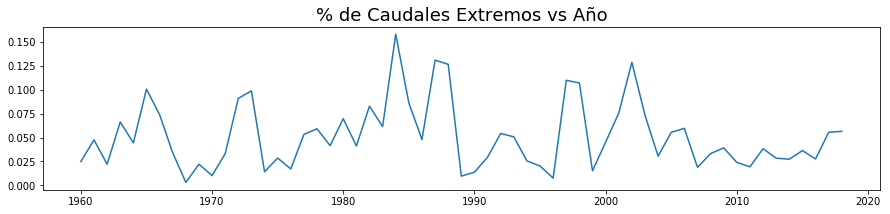

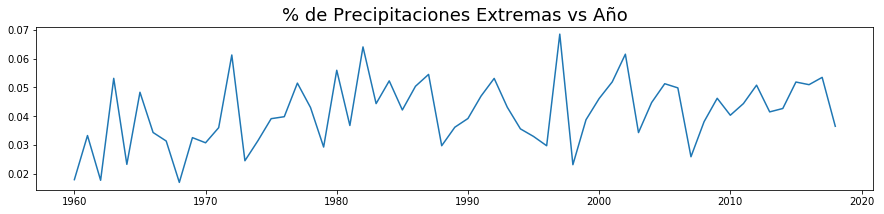

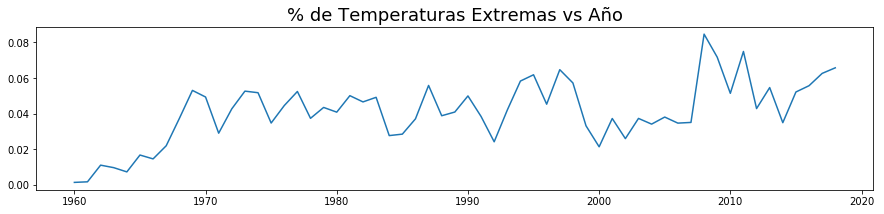

In [23]:
"""
El porcentaje de caudales extremos no va en aumento ni en disminución
El porcentaje de precipitaciones no va en aumento ni en disminucion
El porcentaje de temperaturas extremas va en aumento
"""

plot(df_extremos['year'],df_extremos['caudal_extremo']/df_extremos['fuente'], '% de Caudales Extremos vs Año')
plot(df_extremos['year'],df_extremos['precip_extremo']/df_extremos['fuente'], '% de Precipitaciones Extremas vs Año')
plot(df_extremos['year'],df_extremos['temp_extremo']/df_extremos['fuente'], '% de Temperaturas Extremas vs Año')

### Pregunta 7

El objetivo será entrenar un modelo que pueda predecir un caudal extremo con 3 días de anticipación, esto asumiendo que los datos pueden demorar en estar disponibles y además para tener tiempo para aplicar alguna medida de mitigación o evacuar la zona en caso de que se detecte un potencial caudal extremo.

Para entrenar el modelo se usaran 7 días de historia de las estaciones. Es decir, para predecir hoy habrá un caudal extremo, se usará la información desde hoy-10(días) hasta hoy-3(días).

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [25]:
"""
El sort aqui evita tener que hacerlo en el for aumentando la velocidad
"""

USEFUL_COLS = ['codigo_estacion','altura','latitud','longitud','caudal','precip_promedio','temp_max_promedio',
               'estacion','year','month','fecha']
TARGET = ['caudal_extremo']

df_model = df[USEFUL_COLS+TARGET].sort_values(by='fecha',ascending=False)

In [26]:
"""
Se asume 1 observacion por dia para cada estacion
Se usara una semana de historia para entrenar el modelo
"""

def shift_features(x, cols=['temp_max_promedio','caudal','precip_promedio'], lags=[3,4,5,6,7,8,9,10]):
    x=x.copy()
    for col in cols:
        for lag in lags:
            x[col+'_shift_{}'.format(lag)] = x[col].shift(-lag)
            
        GENERATED_COLS = [col+'_shift_{}'.format(lag) for lag in lags]
        x[col+'_mean'] = x[GENERATED_COLS].mean(axis=1)
        x[col+'_std'] = x[GENERATED_COLS].std(axis=1)
    return x

In [27]:
df_lagged = df_model.groupby(by='codigo_estacion').apply(lambda x: shift_features(x))

In [28]:
df_lagged.head()

,codigo_estacion,altura,latitud,longitud,caudal,precip_promedio,temp_max_promedio,estacion,year,month,...,precip_promedio_shift_3,precip_promedio_shift_4,precip_promedio_shift_5,precip_promedio_shift_6,precip_promedio_shift_7,precip_promedio_shift_8,precip_promedio_shift_9,precip_promedio_shift_10,precip_promedio_mean,precip_promedio_std
52581,COD_ESTACION_7317003,525,-35.754398,-71.086403,0.068,0.0,26.700001,Verano,2018,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.000000
518307,COD_ESTACION_7355002,402,-35.908600,-71.298103,25.707,0.0,NaN,Verano,2018,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.000000
596472,COD_ESTACION_5410005,650,-32.757198,-70.736702,0.132,0.0,23.542000,Verano,2018,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.16,0.0,0.02,0.056569
1125293,COD_ESTACION_4523002,420,-30.704700,-70.924400,84.780,0.0,9.390000,Verano,2018,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.000000
576965,COD_ESTACION_7383001,30,-35.406898,-72.208298,199.867,0.0,24.710909,Verano,2018,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.000000


In [29]:
COLS = ['latitud','estacion','altura','caudal_extremo'] \
        + ['temp_max_promedio_shift_{}'.format(x) for x in range(3,11)] \
        + ['precip_promedio_shift_{}'.format(x) for x in range(3,11)] \
        + ['caudal_shift_{}'.format(x) for x in range(3,11)] \
        + ['caudal_mean','caudal_std']\
        + ['precip_promedio_mean','precip_promedio_std']\
        + ['temp_max_promedio_mean','temp_max_promedio_std']

#Se obtuvo de un recursive feature elimination al final del jupyter en caso de que lo quieran ejecutar
COL_RANKING = [ 1,  6,  2,  7, 14, 17, 15, 12, 16, 13, 11,  5, 18, 20, 19, 21, 23,
       24, 22,  1,  1,  1,  9,  4, 10,  3,  1,  1,  1,  1,  8,  1,  1]

df_col_ranking = pd.DataFrame()
df_col_ranking['COLS'] = ['latitud', 'estacion', 'altura', 'temp_max_promedio_shift_3',
                           'temp_max_promedio_shift_4', 'temp_max_promedio_shift_5',
                           'temp_max_promedio_shift_6', 'temp_max_promedio_shift_7',
                           'temp_max_promedio_shift_8', 'temp_max_promedio_shift_9',
                           'temp_max_promedio_shift_10', 'precip_promedio_shift_3',
                           'precip_promedio_shift_4', 'precip_promedio_shift_5',
                           'precip_promedio_shift_6', 'precip_promedio_shift_7',
                           'precip_promedio_shift_8', 'precip_promedio_shift_9',
                           'precip_promedio_shift_10', 'caudal_shift_3', 'caudal_shift_4',
                           'caudal_shift_5', 'caudal_shift_6', 'caudal_shift_7', 'caudal_shift_8',
                           'caudal_shift_9', 'caudal_shift_10', 'caudal_mean', 'caudal_std',
                           'precip_promedio_mean', 'precip_promedio_std', 'temp_max_promedio_mean',
                           'temp_max_promedio_std']

df_col_ranking['RANKING'] = COL_RANKING
df_col_ranking = df_col_ranking.sort_values(by='RANKING').reset_index(drop=True)

In [30]:
df_col_ranking.head(10)

,COLS,RANKING
0,latitud,1
1,precip_promedio_mean,1
2,caudal_std,1
3,caudal_mean,1
4,caudal_shift_10,1
5,caudal_shift_5,1
6,caudal_shift_4,1
7,caudal_shift_3,1
8,temp_max_promedio_mean,1
9,temp_max_promedio_std,1


In [31]:
df_lagged = df_lagged[df_col_ranking[:10]['COLS'].tolist() + TARGET]

In [32]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    #Replace by mean of target
    def __init__(self, cols):
        self.encoder = {}
        self.reverse_encoder = {}
        self.cols = cols
        
    def fit(self, X, y=None):
        #Iterate over cols
        for col in self.cols:
            self.encoder[col]={}
            self.reverse_encoder[col]={}
            values = X[col].unique()
            #Iterate over categorical values
            for i, v in enumerate(values):
                #get index of data and mean of target
                index = X[col][X[col] == v].index
                PROB_CAUDAL_EXTREMO = y.loc[index].mean()
                self.encoder[col][v] = PROB_CAUDAL_EXTREMO
                self.reverse_encoder[col][PROB_CAUDAL_EXTREMO] = v
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in self.cols:
            X[col] = X[col].map(self.encoder[col])
        return X         

In [33]:
y = df_lagged['caudal_extremo']
X = df_lagged.drop(['caudal_extremo'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)

In [34]:
if 'estacion' in X_train.columns:
    encoder = CategoricalEncoder(['estacion'])
    encoder.fit(X_train, y_train)
    X_train = encoder.transform(X_train)
    X_test = encoder.transform(X_test)

In [35]:
CAUDAL_EXTREMO_BASE_PROB = (y_train.mean())
X_train = X_train.fillna(CAUDAL_EXTREMO_BASE_PROB)
X_test = X_test.fillna(CAUDAL_EXTREMO_BASE_PROB)

In [36]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

c:\users\bldr1\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  0.9643466224483529
Precision:  0.8492208982584785
Recall:  0.3497876356772062


### Pregunta 8

Las métricas usadas para medir la efectividad del modelo son Accuracy, Precision y Recall. El modelo entrenado después de seleccionar características tiene las siguientes métricas: <br>

        Accuracy: 96.4% <br>
        Precision: 84.9% <br>
        Recall: 34.9% <br>
        
El accuracy alto responde a la naturaleza de un dataset desbalanceado. La precisión del modelo indica que cuando predice un caudal extremo hay un 84% de confianza de que sea correcto, mientras que un recall de 35% indica que el modelo es capaz de detectar un 35% de los caudales extremos. 

Estos resultados no son del todo satisfactorios, ya que el modelo solo es capaz de detectar la mitad de los eventos deseados (70%). Sin embargo, hay muchas cosas que se pueden mejorar, cómo hacer un fine tuning de los parámetros, probar con otros modelos, usar filtros para capturar la tendencia de las variables de precipitaciones, temperatura y caudal, agregar más variables geográficas como las regiones, etc.

Las variables más importantes (de acuerdo a RFE) son:<br>
        latitud <br>
        precip_promedio_mean <br>
        caudal_std <br>
        caudal_mean <br>
        caudal_shift_10 <br>
        caudal_shift_5 <br>
        caudal_shift_4 <br>
        caudal_shift_3 <br>
        temp_max_promedio_mean <br>
        temp_max_promedio_std <br>
        
Esto nos dice, que las mediciones de los días anteriores del caudal son muy buenos predictores de lo que va a ocurrir con el caudal en el futuro, mientras que los estadísticos de precipitaciones y temperatura son mas valiosos que los registros por si mismos.

### RECURSIVE FEATURES SELECTION

IMPORTANTE: DEMORA MUCHO

In [ ]:
COLS = ['latitud','estacion','altura','caudal_extremo'] \
        + ['temp_max_promedio_shift_{}'.format(x) for x in range(3,11)] \
        + ['precip_promedio_shift_{}'.format(x) for x in range(3,11)] \
        + ['caudal_shift_{}'.format(x) for x in range(3,11)] \
        + ['caudal_mean','caudal_std']\
        + ['precip_promedio_mean','precip_promedio_std']\
        + ['temp_max_promedio_mean','temp_max_promedio_std']

In [ ]:
df_lagged = df_model.groupby(by='codigo_estacion').apply(lambda x: shift_features(x))
df_lagged = df_lagged[COLS]

In [ ]:
y = df_lagged['caudal_extremo']
X = df_lagged.drop(['caudal_extremo'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)

In [ ]:
if 'estacion' in X_train.columns:
    encoder = CategoricalEncoder(['estacion'])
    encoder.fit(X_train, y_train)
    X_train = encoder.transform(X_train)
    X_test = encoder.transform(X_test)

In [ ]:
CAUDAL_EXTREMO_BASE_PROB = (y_train.mean())
X_train = X_train.fillna(CAUDAL_EXTREMO_BASE_PROB)
X_test = X_test.fillna(CAUDAL_EXTREMO_BASE_PROB)

In [ ]:
from sklearn.feature_selection import RFE
clf = RandomForestClassifier()
selector = RFE(clf, 10, step=1)
selector = selector.fit(X_train, y_train)

In [ ]:
X_train.columns

In [ ]:
selector.ranking_